# Image classification - Fashion MNIST

## Install and import TensorFlow (2.15.0)

In [1]:
! pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.14.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tensorflow_io_gcs_filesystem-0.36.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadat

In [2]:
import tensorflow as tf

2024-02-12 17:38:00.112145: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-12 17:38:00.113672: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 17:38:00.132917: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 17:38:00.132947: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 17:38:00.133580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Load Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = X_train / 255., X_test / 255.

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Visualize some images

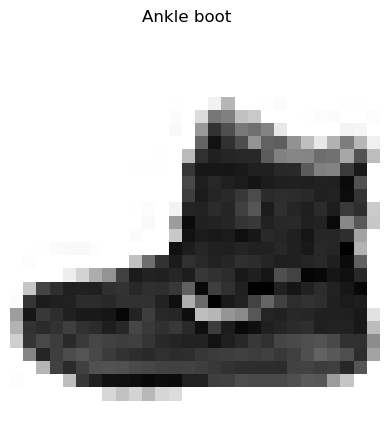

In [7]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.suptitle(class_names[y_train[0]])
plt.axis('off')
plt.show()

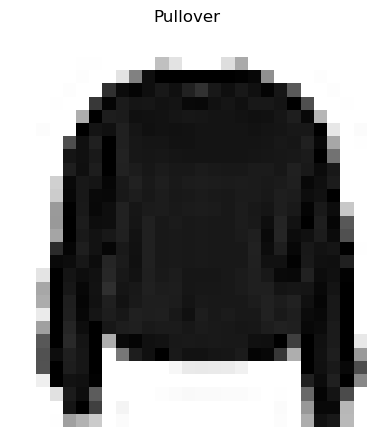

In [8]:
plt.imshow(X_train[7], cmap='binary')
plt.suptitle(class_names[y_train[7]])
plt.axis('off')
plt.show()

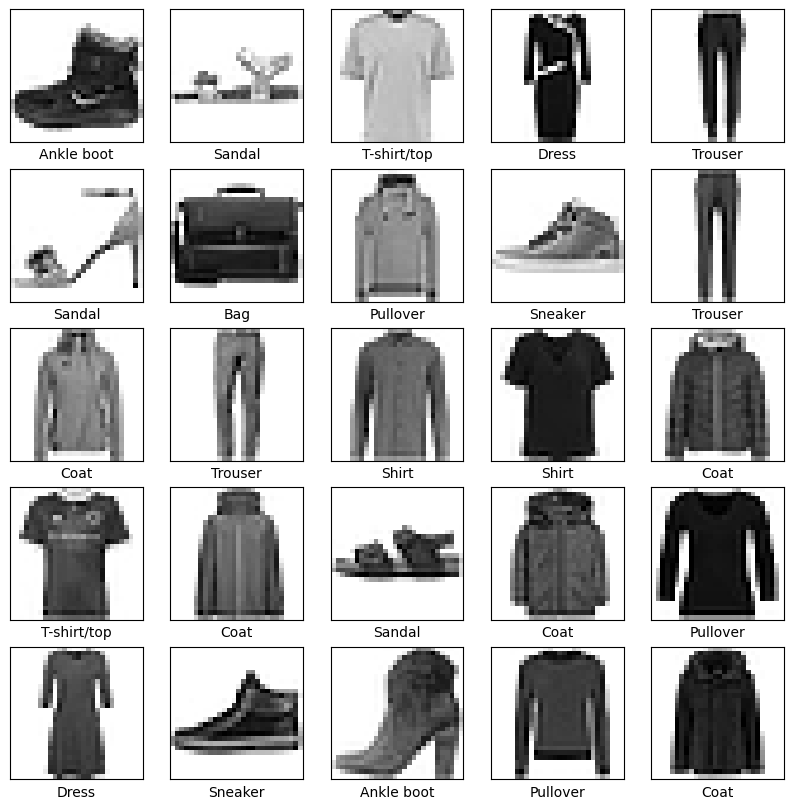

In [9]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[-i], cmap='binary')
    plt.xlabel(class_names[y_train[-i]])
    
    plt.xticks([])
    plt.yticks([])

plt.show()

## Build and compile the model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train and evaluate

In [13]:
r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 718us/step - loss: 0.4656 - accuracy: 0.8359 - val_loss: 0.4153 - val_accuracy: 0.8513
Epoch 2/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.3716 - accuracy: 0.8662 - val_loss: 0.3918 - val_accuracy: 0.8595
Epoch 3/10
1875/1875 [==============================] - 1s 730us/step - loss: 0.3368 - accuracy: 0.8767 - val_loss: 0.3694 - val_accuracy: 0.8684
Epoch 4/10
1875/1875 [==============================] - 1s 695us/step - loss: 0.3120 - accuracy: 0.8862 - val_loss: 0.3721 - val_accuracy: 0.8630
Epoch 5/10
1875/1875 [==============================] - 1s 728us/step - loss: 0.2946 - accuracy: 0.8924 - val_loss: 0.3633 - val_accuracy: 0.8700
Epoch 6/10
1875/1875 [==============================] - 1s 684us/step - loss: 0.2801 - accuracy: 0.8964 - val_loss: 0.3769 - val_accuracy: 0.8677
Epoch 7/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.2671 - accuracy: 0.9013 - val_loss: 0.3389 -

In [14]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3300 - accuracy: 0.8828 - 105ms/epoch - 336us/step


[0.3299771845340729, 0.8827999830245972]

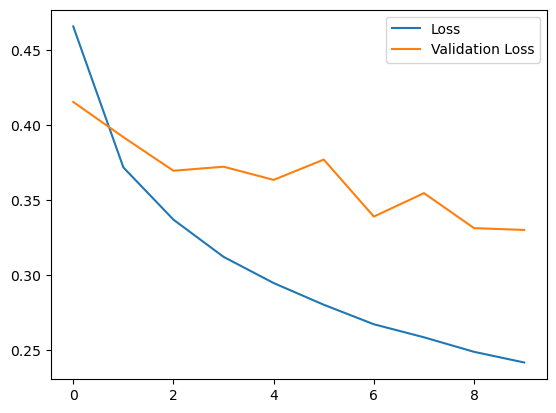

In [15]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')

plt.legend()

plt.show()

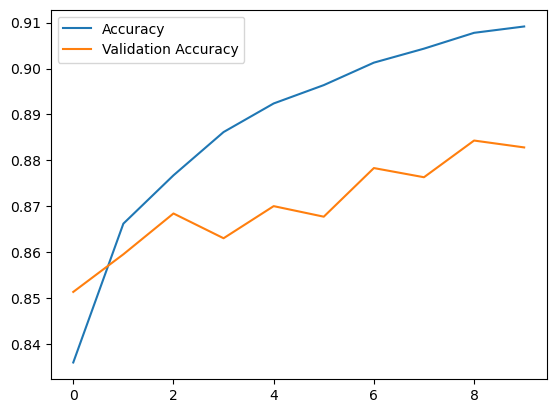

In [16]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')

plt.legend()

plt.show()

## Make predictions

In [17]:
proba_model = tf.keras.models.Sequential([model,
                                          tf.keras.layers.Softmax()])

proba_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                101770    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
predictions = proba_model.predict(X_test)

predictions.shape

313/313 [==============================] - 0s 400us/step


(10000, 10)

In [20]:
predictions[0]

array([7.3855077e-08, 2.7618201e-09, 3.9747857e-08, 3.3496146e-08,
       3.0965836e-07, 1.2265892e-02, 2.1763739e-07, 7.1337423e-03,
       4.5063680e-06, 9.8059511e-01], dtype=float32)

In [21]:
y_test[0]

9

In [27]:
import numpy as np

In [23]:
def plot_image(i, predictions, y_true, img):
    y_true, img = y_true[i], img[i]
    
    plt.xticks([])
    plt.xticks([])

    plt.imshow(img, cmap='binary')
    
    predict = np.argmax(predictions)
    
    color = 'blue' if predict == y_true else 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predict],
                                         100 * np.max(predictions),
                                         class_names[y_true],
                                         color=color))

In [25]:
def plot_value_array(i, predictions, y_true):
    y_true = y_true[i]
    
    plt.xticks(range(10))
    plt.yticks([])
    
    this_plot = plt.bar(range(10), predictions, color='#777777')
    
    plt.ylim([0, 1])
    
    predict = np.argmax(predictions)
    
    this_plot[predict].set_color('red')
    this_plot[y_true].set_color('blue')

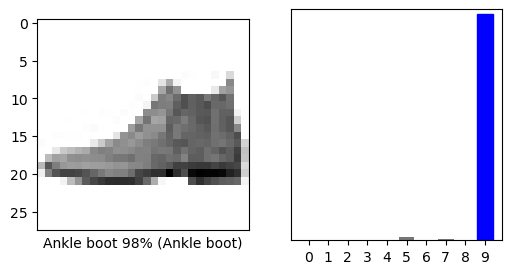

In [28]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test)

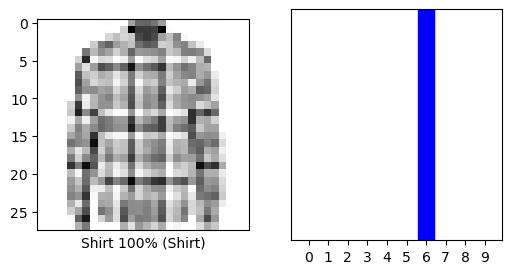

In [29]:
i = 7
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test)

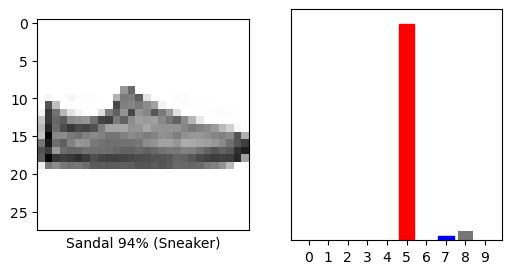

In [30]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], y_test)

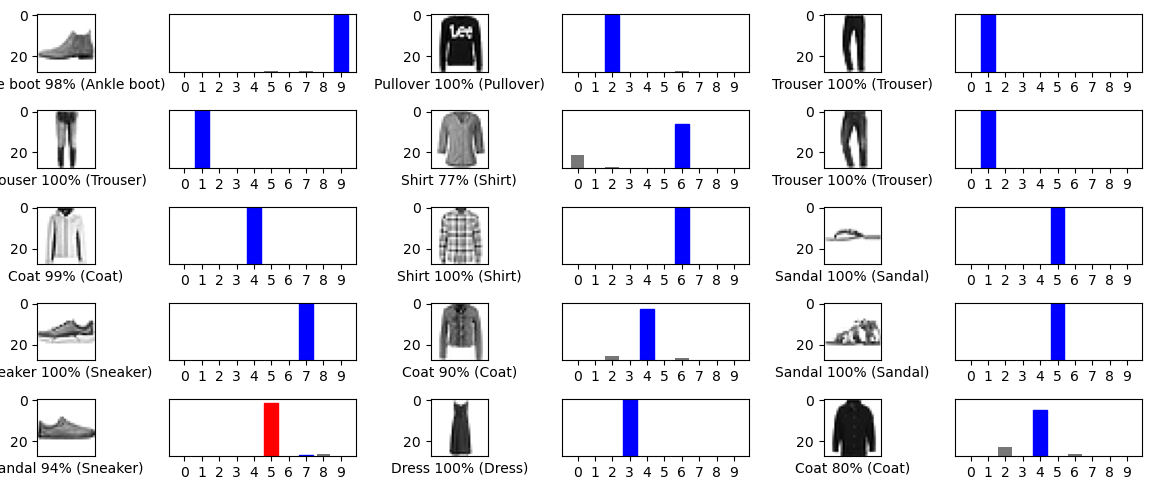

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    
    plot_image(i, predictions[i], y_test, X_test)
    
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    
    plot_value_array(i, predictions[i], y_test)
    
plt.tight_layout()
plt.show()

In [48]:
img_sample = X_test[1]
img_sample.shape

(28, 28)

In [49]:
img_sample = np.expand_dims(img_sample, 0)
img_sample.shape

(1, 28, 28)

In [50]:
img_sample_pred = proba_model.predict(img_sample)
img_sample_pred

1/1 [==============================] - 0s 12ms/step


array([[9.1385889e-05, 2.6071573e-12, 9.9632865e-01, 4.5394636e-08,
        7.5413566e-04, 2.7072945e-12, 2.8255731e-03, 2.1253027e-13,
        1.9775759e-07, 5.0327479e-15]], dtype=float32)

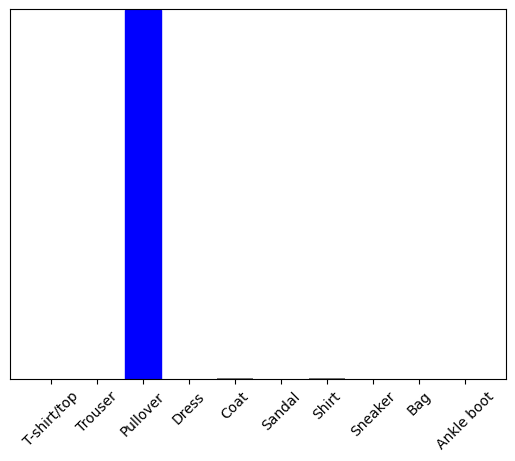

In [51]:
plot_value_array(1, img_sample_pred[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()